In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [2]:
data = scipy.io.loadmat('ex3data1.mat')

In [3]:
X, Y = data['X'], data['y']

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(5000, 400)

In [6]:
Y.shape

(5000, 1)

# Visualizing the data

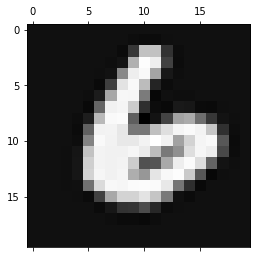

In [7]:
plt.matshow(X[np.random.randint(X.shape[0])].reshape(20, 20, order='F'), cmap=plt.get_cmap('gray'))
# plt.imshow(X[np.random.randint(X.shape[0])].reshape(20, 20).transpose(), cmap=plt.get_cmap('gray'))

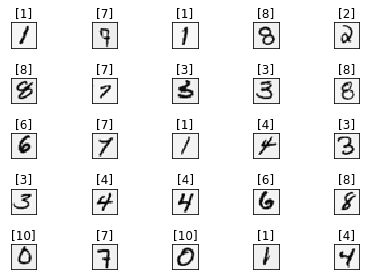

In [9]:
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols)
rand_data = None

for row in axes:
    for col in row:
        rand_data = np.random.randint(X.shape[0])
        col.matshow(X[rand_data].reshape(20, 20, order='F'), cmap=plt.get_cmap('binary'))
        col.axes.xaxis.set_visible(False)
        col.axes.yaxis.set_visible(False)
        col.set_title(str(Y[rand_data]))
fig.tight_layout()

In [10]:
X = np.c_[X.shape[0]*[1],X]

In [16]:
y = np.zeros((Y.size, Y.max()+1))
y[ np.arange(Y.size), np.transpose(Y) ] = 1
y.shape

(5000, 11)

In [18]:
y[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
sum(np.array( [1, 2, 3] )**2)

14

In [25]:
def compute_cost(theta, X, Y):
    landa = 0.1
    m = X.shape[0]
    return -1/m * sum( \
                      np.multiply(Y, np.log( 1/(1 + np.exp(-np.matmul(X, theta))) )) \
                      + np.multiply( (1 - Y), np.log(1 - 1/(1 + np.exp(-np.matmul(X, theta)))) ) ) \
+ landa*sum(np.array(theta)**2)/(2*m)

In [26]:
compute_cost([0]*401, X, y[:,1])

0.6931471805599918

In [39]:
def gradient(theta, X, Y):
    landa = 0.1
    m = X.shape[0]
    return np.matmul( \
                     np.transpose(1/(1 + np.exp(-np.matmul(X, theta))) - Y ), X) / m \
+ landa/m * sum(theta)

In [40]:
gradient([0]*401, X, y[:,2])

array([ 4.00000000e-01,  0.00000000e+00,  0.00000000e+00,  7.74530186e-08,
       -9.97070738e-07, -1.15631298e-06,  6.44538994e-05,  7.50594141e-05,
        4.03447712e-05,  9.68564474e-06,  2.18079282e-05,  7.05070976e-06,
       -5.42333538e-06, -1.19247007e-05, -1.96991592e-05, -2.38992290e-05,
       -1.78751787e-05, -7.19873366e-06, -4.63698993e-08,  7.31889978e-08,
        0.00000000e+00,  2.46800109e-08, -2.04588780e-07, -1.03629082e-06,
        2.53608388e-10, -1.12721490e-05,  4.68488817e-05,  3.12233725e-04,
        4.68399106e-04,  3.64627681e-04,  1.39936378e-04, -3.86095673e-05,
       -5.98996068e-05,  2.28370157e-05,  1.04388617e-04,  1.42061981e-04,
        9.58477754e-05,  2.34739073e-05, -2.13109773e-05, -4.44090414e-06,
       -8.85893246e-07, -2.11721903e-07,  1.63089560e-06, -6.32532759e-06,
        1.13485408e-04,  4.58223112e-04,  1.10837520e-03,  2.01684316e-03,
        2.63625890e-03,  2.00149518e-03,  8.65868704e-04,  4.46336950e-04,
        2.31495409e-04,  

In [43]:
from scipy.optimize import minimize
result=[]
for i in range(10):
    result.append(minimize(compute_cost, x0=[0]*401, args=(X, np.transpose(y)[i+1]), method ='CG', jac=gradient))

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [71]:
sigmoid(np.matmul(result[9].x, np.transpose(X)))[0]

0.9998560767321241

so first row belongs zeros class